# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install openweathermapy

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
!pip install citipy

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#print(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#openweathermap (owm) API Key
api_key = api_keys.api_key

# owm url - Fahrenheit = imperial, Celsius = metric, Kelvin = default
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# Build query URL
query_url = url + "appid=" + api_key

# city_data list
city_data = []

# Print beginning of retrieval
print("Beginning Data Retrieval     ")
print("-----------------------------")

# counters created to group records in sets of 50
record_counter = 0
set_counter = 1

for city in cities:

    if record_counter == 50:
        set_counter = set_counter + 1
        record_counter = 0   
        
    # record counter add 1
    record_counter = record_counter + 1
    
    # url query to pull data for the city
    city_url = query_url + "&q=" + city
    
    # print record # of set # | city
    print(f"Processing Record of {record_counter} of Set {set_counter} | {city}")

    #Run an API for each city to pull the weather in
    #Between each pull, be sure to wait 1-2 seconds so that I can be within the
    #parameters of the OWM API constraints 60 calls/min = 1 record call/sec. 
    
    try: 
        weather_response = requests.get(city_url).json()
        time.sleep(2)
        
        #extract the data from city_url and create the variables
        city_cloud = weather_response["clouds"]["all"]
        city_country = weather_response["sys"]["country"]
        city_date = weather_response["dt"]
        city_humidity = weather_response["main"]["humidity"]
        city_lat = weather_response["coord"]["lat"]
        city_long = weather_response["coord"]["lon"]
        city_max_temp = weather_response["main"]["temp_max"]
        city_wind = weather_response["wind"]["speed"]
        
        #append the city_data list
        city_data.append({"City": city,
                             "Cloudiness": city_cloud,   
                             "Country": city_country,
                             "Date": city_date,   
                             "Humidity": city_humidity,    
                             "Lat": city_lat,
                             "Lng": city_long,
                             "Max Temp": round(city_max_temp,2),
                             "Wind Speed": city_wind})

    # If there is an error, indicate that the city is not found and the record is being skipped
    except:
        print("City not found. Skipping...")
        pass

# Print End of Retrieval
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record of 1 of Set 1 | okhotsk
Processing Record of 2 of Set 1 | jamestown
Processing Record of 3 of Set 1 | qasigiannguit
Processing Record of 4 of Set 1 | khatanga
Processing Record of 5 of Set 1 | punta arenas
Processing Record of 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record of 7 of Set 1 | katiola
Processing Record of 8 of Set 1 | gonaives
Processing Record of 9 of Set 1 | rikitea
Processing Record of 10 of Set 1 | hermanus
Processing Record of 11 of Set 1 | ust-ilimsk
Processing Record of 12 of Set 1 | srednekolymsk
Processing Record of 13 of Set 1 | yellowknife
Processing Record of 14 of Set 1 | choma
Processing Record of 15 of Set 1 | san cristobal
Processing Record of 16 of Set 1 | castro
Processing Record of 17 of Set 1 | pavilosta
Processing Record of 18 of Set 1 | flinders
Processing Record of 19 of Set 1 | turbat
Processing Record of 20 of Set 1 | butaritari
Processing Reco

Processing Record of 25 of Set 4 | satitoa
City not found. Skipping...
Processing Record of 26 of Set 4 | berdyaush
Processing Record of 27 of Set 4 | belawan
Processing Record of 28 of Set 4 | hami
Processing Record of 29 of Set 4 | maryville
Processing Record of 30 of Set 4 | praia
Processing Record of 31 of Set 4 | salym
Processing Record of 32 of Set 4 | mangrol
Processing Record of 33 of Set 4 | namtsy
Processing Record of 34 of Set 4 | grand-santi
Processing Record of 35 of Set 4 | zhanakorgan
Processing Record of 36 of Set 4 | berlevag
Processing Record of 37 of Set 4 | agva
City not found. Skipping...
Processing Record of 38 of Set 4 | noyabrsk
Processing Record of 39 of Set 4 | kawalu
Processing Record of 40 of Set 4 | patos de minas
Processing Record of 41 of Set 4 | lata
Processing Record of 42 of Set 4 | chaozhou
Processing Record of 43 of Set 4 | palmer
Processing Record of 44 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record of 45 of Set 4 | biltine
Pr

Processing Record of 49 of Set 7 | emba
Processing Record of 50 of Set 7 | vinukonda
Processing Record of 1 of Set 8 | karauzyak
City not found. Skipping...
Processing Record of 2 of Set 8 | saint-francois
Processing Record of 3 of Set 8 | clyde river
Processing Record of 4 of Set 8 | kahului
Processing Record of 5 of Set 8 | ambon
Processing Record of 6 of Set 8 | fort nelson
Processing Record of 7 of Set 8 | talnakh
Processing Record of 8 of Set 8 | hambantota
Processing Record of 9 of Set 8 | mitsamiouli
Processing Record of 10 of Set 8 | mezhova
Processing Record of 11 of Set 8 | sainte-savine
Processing Record of 12 of Set 8 | okato
Processing Record of 13 of Set 8 | iquitos
Processing Record of 14 of Set 8 | copiapo
Processing Record of 15 of Set 8 | ostrovnoy
Processing Record of 16 of Set 8 | northam
Processing Record of 17 of Set 8 | beloha
Processing Record of 18 of Set 8 | baherden
Processing Record of 19 of Set 8 | athabasca
Processing Record of 20 of Set 8 | kanigoro
Proce

Processing Record of 22 of Set 11 | valle de allende
Processing Record of 23 of Set 11 | san estanislao
Processing Record of 24 of Set 11 | sirfa
City not found. Skipping...
Processing Record of 25 of Set 11 | nichinan
Processing Record of 26 of Set 11 | finschhafen
Processing Record of 27 of Set 11 | ust-kamchatsk
City not found. Skipping...
Processing Record of 28 of Set 11 | strathmore
Processing Record of 29 of Set 11 | meyungs
City not found. Skipping...
Processing Record of 30 of Set 11 | neiafu
Processing Record of 31 of Set 11 | kamenskoye
City not found. Skipping...
Processing Record of 32 of Set 11 | abu kamal
Processing Record of 33 of Set 11 | hammerfest
Processing Record of 34 of Set 11 | waipawa
Processing Record of 35 of Set 11 | urzhum
Processing Record of 36 of Set 11 | fevralsk
City not found. Skipping...
Processing Record of 37 of Set 11 | nuqui
Processing Record of 38 of Set 11 | huancavelica
Processing Record of 39 of Set 11 | chegdomyn
Processing Record of 40 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a DataFrame of the city_data
city_weather_df = pd.DataFrame(city_data)

# Verify we have complete data 
city_weather_df.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lng           534
Max Temp      534
Wind Speed    534
dtype: int64

In [5]:
# Save the table to a csv file
city_weather_df.to_csv("output_data/cities.csv")

In [6]:
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,okhotsk,24,RU,1540665825,100,59.36,143.24,24.10,4.72
1,jamestown,92,AU,1540665521,66,-33.21,138.60,56.27,3.38
2,qasigiannguit,75,GL,1540662600,51,68.82,-51.19,35.60,9.17
3,khatanga,92,RU,1540665832,89,71.98,102.47,27.16,16.58
4,punta arenas,40,CL,1540663200,79,-53.16,-70.91,51.80,19.46


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

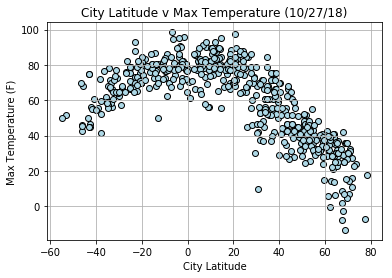

In [7]:
#Create Variables for X-axis and Y-axis
lat = city_weather_df["Lat"]
max_temp = city_weather_df["Max Temp"]

#Create Scatter Plot
plt.scatter(lat, max_temp, marker="o", facecolors="lightblue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v Max Temperature (10/27/18)", fontsize=12)
plt.xlabel("City Latitude", fontsize=10)
plt.ylabel("Max Temperature (F)", fontsize=10)
plt.grid(True)
          
# Save Files          
plt.savefig("output_data/lat_v_maxtemp.png")
plt.show()  

#### Latitude vs. Humidity Plot

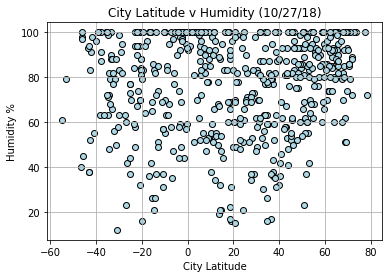

In [8]:
#Create Variables for X-axis and Y-axis
lat = city_weather_df["Lat"]
humidity = city_weather_df["Humidity"]

#Create Scatter Plot
plt.scatter(lat, humidity, marker="o", facecolors="lightblue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v Humidity (10/27/18)", fontsize=12)
plt.xlabel("City Latitude", fontsize=10)
plt.ylabel("Humidity %", fontsize=10)
plt.grid(True)
          
# Save Files          
plt.savefig("output_data/lat_v_humidity.png")
plt.show()  

#### Latitude vs. Cloudiness Plot

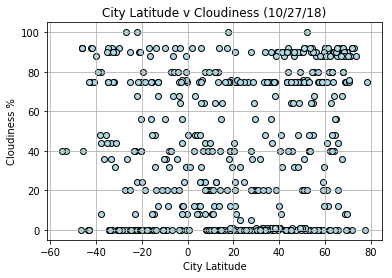

In [9]:
#Create Variables for X-axis and Y-axis
lat = city_weather_df["Lat"]
clouds = city_weather_df["Cloudiness"]

#Create Scatter Plot
plt.scatter(lat, clouds, marker="o", facecolors="lightblue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v Cloudiness (10/27/18)", fontsize=12)
plt.xlabel("City Latitude", fontsize=10)
plt.ylabel("Cloudiness %", fontsize=10)
plt.grid(True)
          
# Save Files          
plt.savefig("output_data/lat_v_cloudiness.png")
plt.show()  

#### Latitude vs. Wind Speed Plot

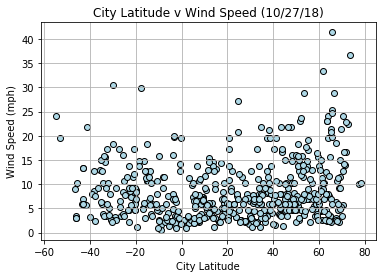

In [10]:
#Create Variables for X-axis and Y-axis
lat = city_weather_df["Lat"]
wind_spd = city_weather_df["Wind Speed"]

#Create Scatter Plot
plt.scatter(lat, wind_spd, marker="o", facecolors="lightblue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v Wind Speed (10/27/18)", fontsize=12)
plt.xlabel("City Latitude", fontsize=10)
plt.ylabel("Wind Speed (mph)", fontsize=10)
plt.grid(True)
          
# Save Files          
plt.savefig("output_data/lat_v_windspeed.png")
plt.show()  